# Pairplots After Alignments 

Even though the latent distribution test is a complex algorithm, it does not perform well on the unmatched networks.Thus, to assess how successful the latent distribution test is in aligning two graphs, we visualize some of these alignments within two graphs of the same order after ASE.

First, let's load the data.

In [2]:
# HIDE CELL
from pathlib import Path
import numpy as np
import random
import pandas as pd

graphs_all = np.zeros((225, 200, 200))
species_list = []

npy_files = Path('../mami_data/conn').glob('*')
for i, file in enumerate(npy_files):
    graphs_all[i] = np.load(file)
    filestr = str(file).split('/')[-1]
    filestr = filestr.split('.')[0]
    species_list.append(filestr)

random.seed(3)

# construct labels based on taxonomy orders
info_df = pd.read_csv('../mami_data/info.csv')
filenames = info_df.pop("Filename").to_list()
orders_all = info_df.pop("Order").to_list()

order_mapper = {}
for i, filename in enumerate(filenames):
    if orders_all[i] == 'Artiodactyla':
        orders_all[i] = 'Cetartiodactyla'
    order_mapper[filename] = orders_all[i]

labels_all = list(map(order_mapper.get, species_list))

# get subset of labels, graphs
orders = ['Chiroptera', 'Primates']
ind_ch = []
ind_pr = []
labels = []

for i, label in enumerate(labels_all):
    if label == 'Chiroptera':
        ind_ch.append(i)
    elif label == 'Primates':
        ind_pr.append(i)

ind_ch_samp = random.sample(ind_ch, len(ind_ch)//2)
ind_pr_samp = random.sample(ind_pr, len(ind_pr)//2)

ind = ind_ch_samp + ind_pr_samp
ind.sort()
graphs = graphs_all[ind]
labels = list(np.array(labels_all)[ind])

mapper = {}

for i, label in enumerate(set(labels)):
    mapper[label] = i
y = list(map(mapper.get, labels))

print(len(labels))

38


We find the [Adjacency spectral embeddings](https://microsoft.github.io/graspologic/latest/reference/reference/embed.html#graspologic.embed.AdjacencySpectralEmbed) of the largest connected component of each graph, then align two graphs within the same order using the [seedless-procrustes](https://microsoft.github.io/graspologic/latest/reference/reference/align.html#graspologic.align.SeedlessProcrustes) alignment method. Then we visualize these alignments using [pairplots](https://microsoft.github.io/graspologic/latest/reference/reference/plotting.html#graspologic.plot.pairplot).

## Chiroptera (Bats)

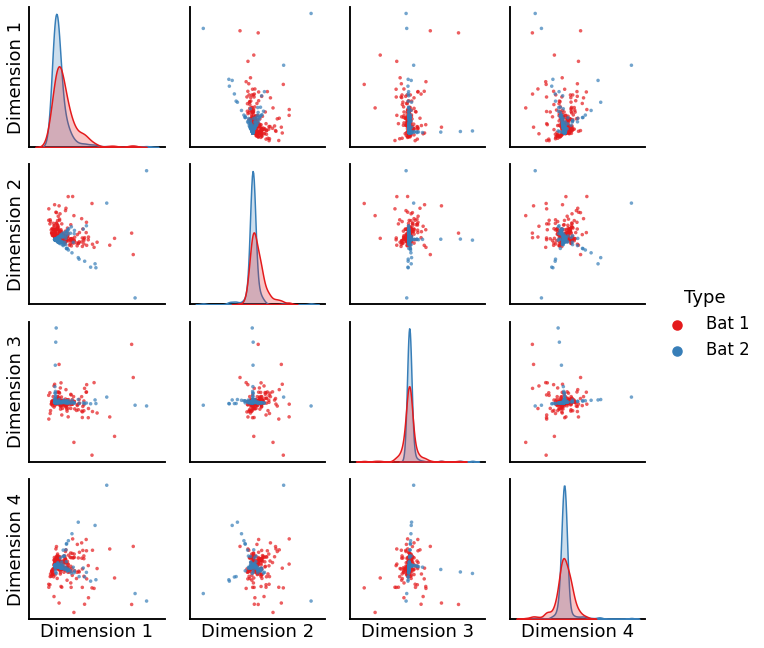

In [4]:
# HIDE CODE
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.utils import largest_connected_component
from graspologic.align import SeedlessProcrustes
from graspologic.plot import pairplot
import warnings
warnings.filterwarnings("ignore")

ase_graphs = []
for i, graph in enumerate(graphs):
    lcc_graph = largest_connected_component(graph)
    ase_graph = AdjacencySpectralEmbed(n_components=4).fit_transform(lcc_graph)
    ase_graphs.append(ase_graph)

aligner=SeedlessProcrustes()
graph_bat = aligner.fit_transform(ase_graphs[1], ase_graphs[4])

labels_bat = ['Bat 1'] * 200 + ['Bat 2'] * 200
X_bat = np.concatenate((graph_bat, ase_graphs[4]), axis=0)
plot_bat = pairplot(X_bat, labels_bat)

## Primates

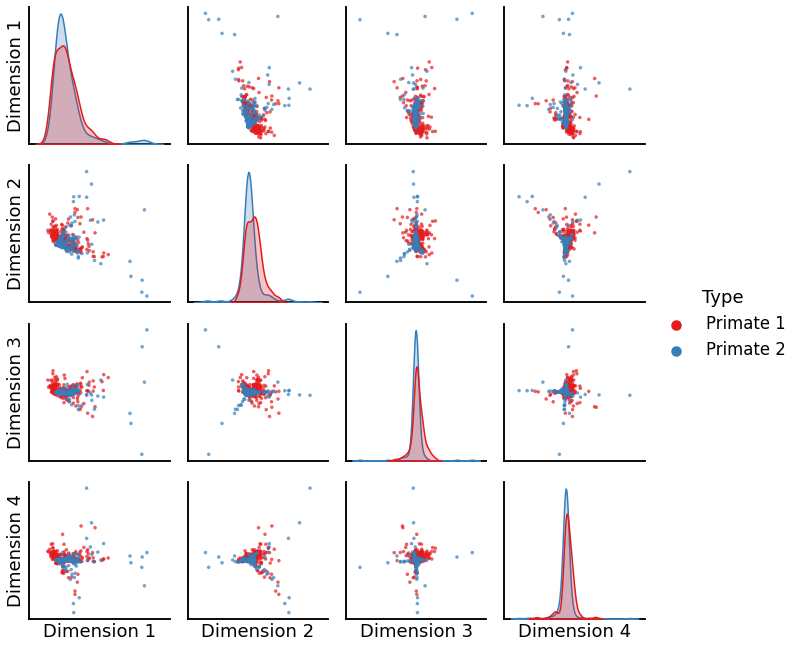

In [5]:
# HIDE CODE

aligner=SeedlessProcrustes()
graph_primate = aligner.fit_transform(ase_graphs[0], ase_graphs[2])

labels_primate = ['Primate 1'] * 200 + ['Primate 2'] * 200
X_primate = np.concatenate((graph_primate, ase_graphs[2]), axis=0)
plot_primate = pairplot(X_primate, labels_primate)

We see that the algorithm is unable to produce good alignments between two graphs of the same order, which accounts for its low discriminability index.